Implement Naïve Bayes theorem to classify the English text

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [9]:
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

In [10]:
df = pd.DataFrame({'text': newsgroups.data, 'label': newsgroups.target})

In [11]:
print(df.head())

                                                text  label
0  \n\nI am sure some bashers of Pens fans are pr...     10
1  My brother is in the market for a high-perform...      3
2  \n\n\n\n\tFinally you said what you dream abou...     17
3  \nThink!\n\nIt's the SCSI card doing the DMA t...      3
4  1)    I have an old Jasmine drive which I cann...      4


In [12]:
print(df.isnull().sum())

text     0
label    0
dtype: int64


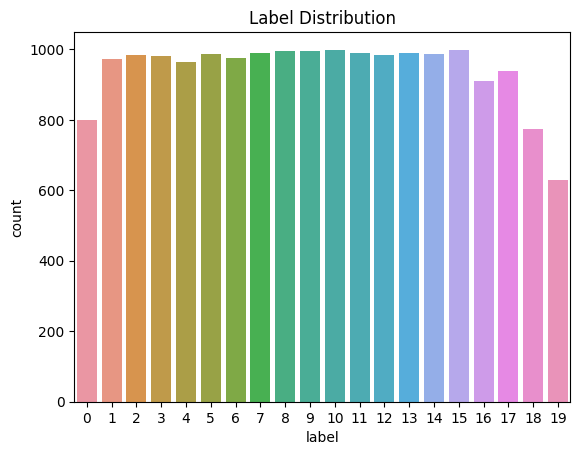

In [13]:
sns.countplot(data=df, x='label')
plt.title('Label Distribution')
plt.show()

In [14]:
X = df['text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [16]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vec, y_train)

MultinomialNB()

In [17]:
y_pred = nb_classifier.predict(X_test_vec)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print("\nClassifier Accuracy:", accuracy)


Classifier Accuracy: 0.6175066312997347


In [19]:
class_report = classification_report(y_test, y_pred, target_names=newsgroups.target_names)
print("\nClassification Report:\n", class_report)


Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.61      0.25      0.36       151
           comp.graphics       0.48      0.75      0.58       202
 comp.os.ms-windows.misc       0.73      0.04      0.08       195
comp.sys.ibm.pc.hardware       0.53      0.73      0.62       183
   comp.sys.mac.hardware       0.86      0.58      0.69       205
          comp.windows.x       0.68      0.80      0.74       215
            misc.forsale       0.88      0.53      0.66       193
               rec.autos       0.87      0.63      0.73       196
         rec.motorcycles       0.49      0.58      0.53       168
      rec.sport.baseball       0.99      0.67      0.80       211
        rec.sport.hockey       0.92      0.80      0.86       198
               sci.crypt       0.59      0.77      0.67       201
         sci.electronics       0.84      0.49      0.62       202
                 sci.med       0.82      0.75     

In [20]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[ 38   1   0   0   0   0   0   1   5   0   0   1   0   1   3  75   2  13
    8   3]
 [  1 151   0   9   1   6   1   1   6   0   1   8   0   2   5   6   1   2
    1   0]
 [  1  50   8  48   5  51   0   0   7   0   0  13   2   0   1   5   1   0
    3   0]
 [  0  16   0 134   6  10   2   0   1   0   0   5   2   1   0   4   0   1
    1   0]
 [  2  15   1  16 119   2   2   1  12   0   0  13   3   5   2   7   0   2
    3   0]
 [  0  29   0   5   0 171   0   0   2   0   0   0   0   1   1   4   0   1
    1   0]
 [  0  12   0  26   5   3 103   4   2   0   1  11   6   3   4   5   1   3
    4   0]
 [  1   3   0   0   0   1   2 124  10   0   1   8   3   0   4   8   1  12
   18   0]
 [  0   2   0   0   0   1   4   8  98   1   1   5   0   1   3  11   3  17
   13   0]
 [  0   2   0   0   0   0   0   0  10 142   6   2   0   1   0  23   0  15
   10   0]
 [  1   1   0   0   0   0   0   0   5   0 159   2   0   2   0  13   0   5
   10   0]
 [  0   5   1   0   1   1   0   0   1   0   1

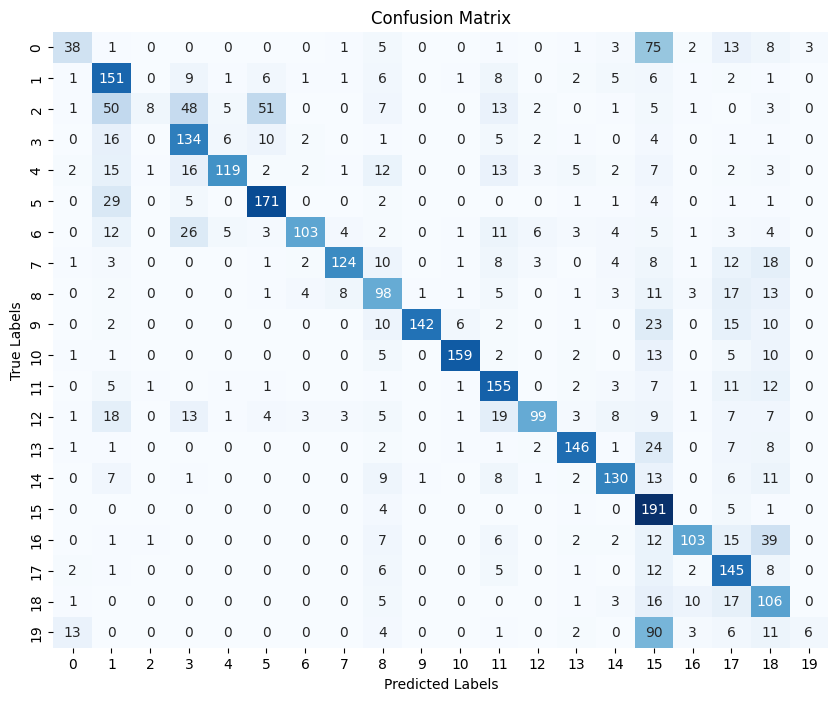

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Implement an algorithm to demonstrate the significance of SVM

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [31]:
cancer = load_breast_cancer()

In [32]:
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target

In [33]:
print("Sample of the Breast Cancer Wisconsin Dataset:")
print(cancer_df.head())

Sample of the Breast Cancer Wisconsin Dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture

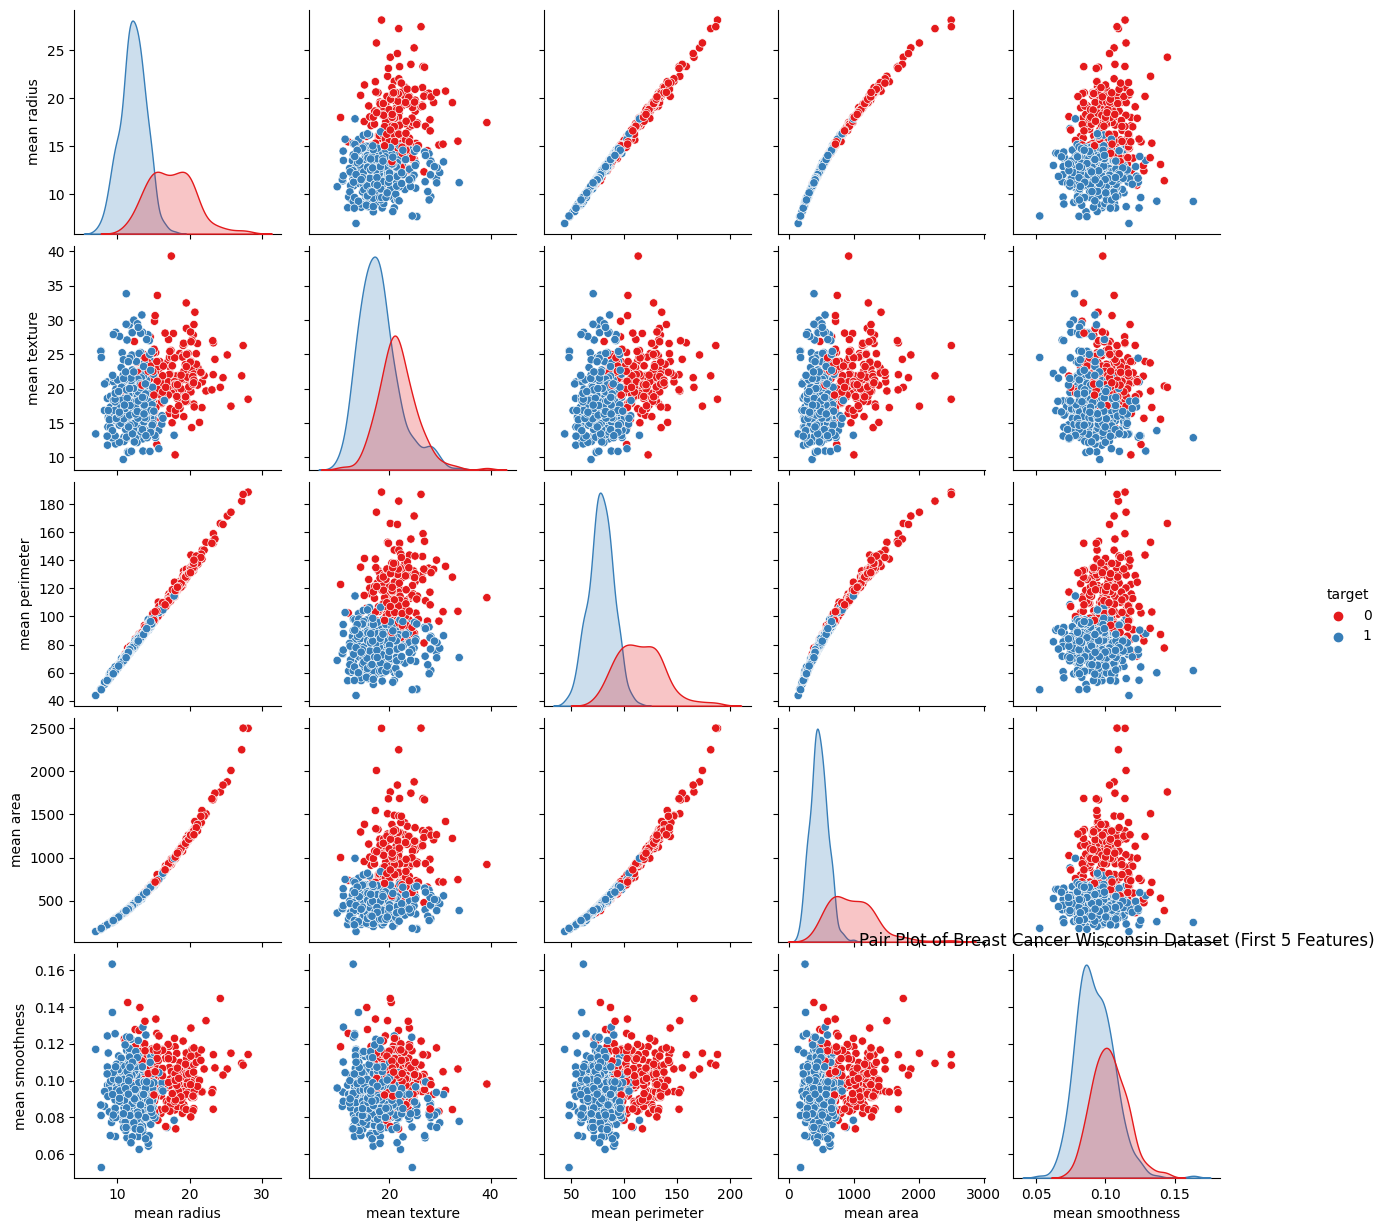

In [34]:
sns.pairplot(cancer_df, hue='target', vars=cancer.feature_names[:5], palette='Set1')
plt.title('Pair Plot of Breast Cancer Wisconsin Dataset (First 5 Features)')
plt.show()

In [27]:
feature_statistics = cancer_df.describe()

In [28]:
print("\nStatistical Features:")
print(feature_statistics)


Statistical Features:
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000           

In [35]:
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
svm_classifier = SVC(kernel='rbf', gamma='scale', random_state=42)

In [37]:
svm_classifier.fit(X_train, y_train)

SVC(random_state=42)

In [38]:
y_pred = svm_classifier.predict(X_test)

In [39]:
accuracy = accuracy_score(y_test, y_pred)
print("\nClassifier Accuracy:", accuracy)


Classifier Accuracy: 0.9473684210526315


In [40]:
class_report = classification_report(y_test, y_pred, target_names=cancer.target_names)
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

   malignant       1.00      0.86      0.92        43
      benign       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [41]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[37  6]
 [ 0 71]]


Implement an algorithm to demonstrate the use of Decision Tree Classifier and Random Forest Classifier.

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from graphviz import Source
from IPython.display import SVG

In [43]:
iris = load_iris()

In [44]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

In [45]:
print("Sample of the Iris Dataset:")
print(iris_df.head())

Sample of the Iris Dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


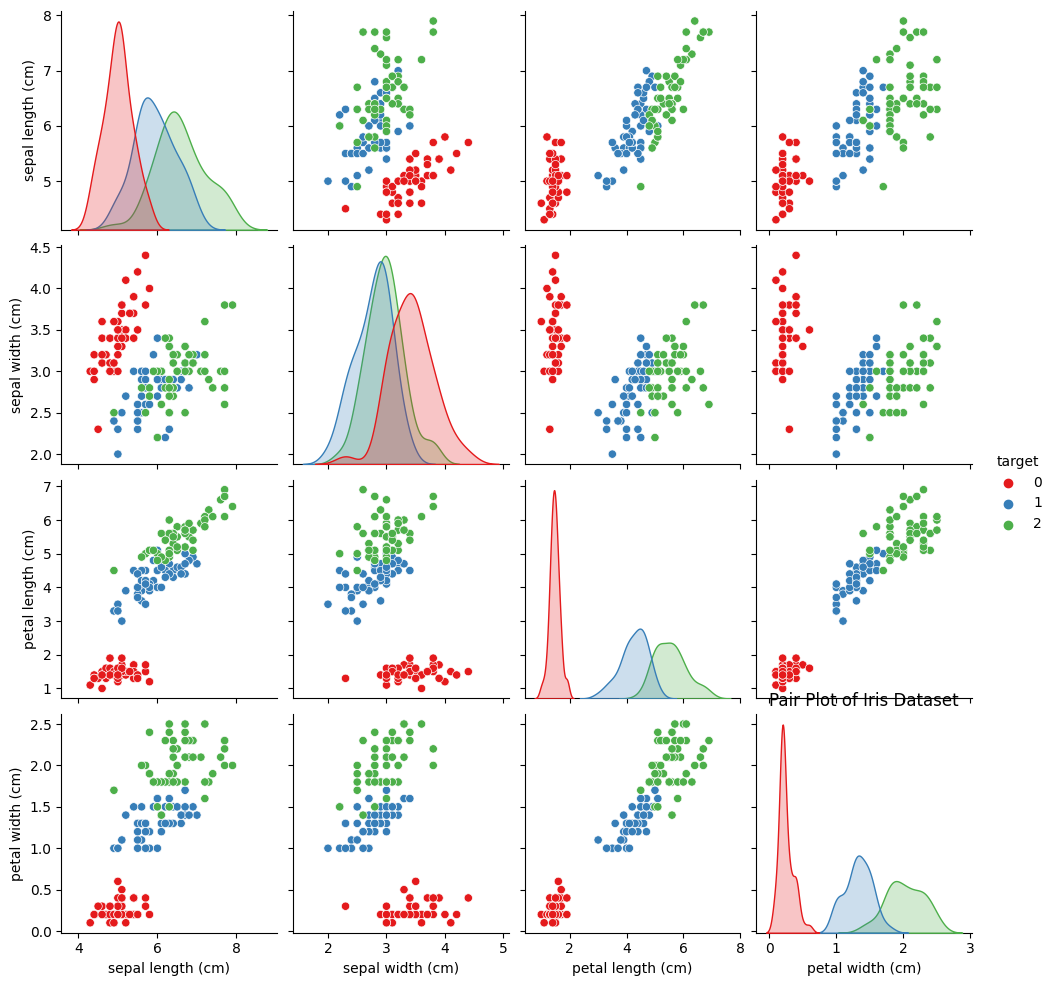

In [46]:
sns.pairplot(iris_df, hue='target', palette='Set1')
plt.title('Pair Plot of Iris Dataset')
plt.show()

In [47]:
data_description = iris_df.describe()

In [48]:
print("\nData Description:")
print(data_description)


Data Description:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [49]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
decision_tree = DecisionTreeClassifier(random_state=42)

In [51]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [53]:
y_pred_dt = decision_tree.predict(X_test)

In [54]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("\nDecision Tree Classifier Accuracy:", accuracy_dt)


Decision Tree Classifier Accuracy: 1.0


In [55]:
class_report_dt = classification_report(y_test, y_pred_dt, target_names=iris.target_names)
print("\nClassification Report (Decision Tree):\n", class_report_dt)


Classification Report (Decision Tree):
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [56]:
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix (Decision Tree):\n", conf_matrix_dt)


Confusion Matrix (Decision Tree):
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


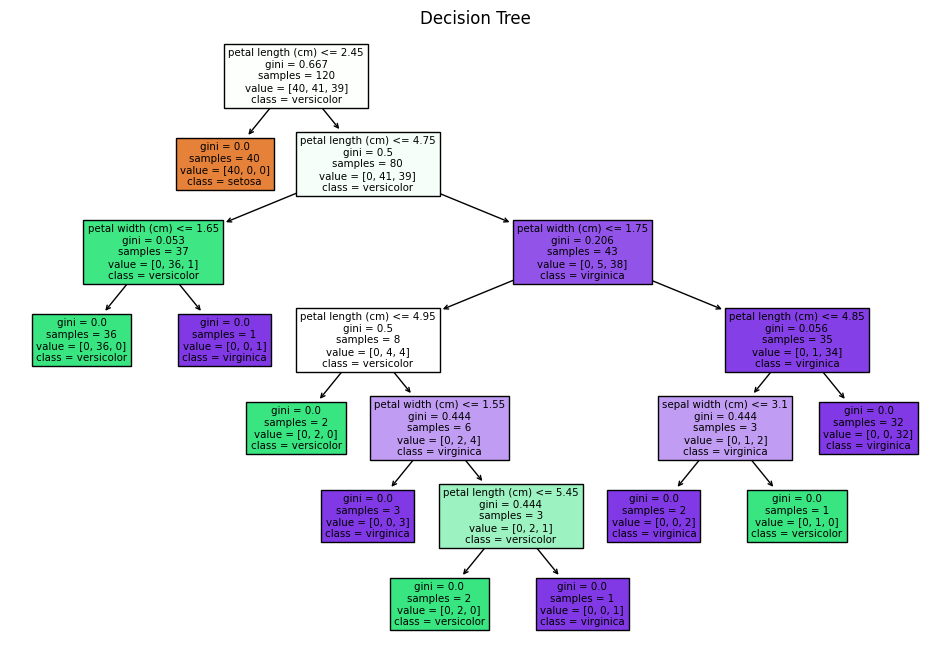

In [57]:
plt.figure(figsize=(12, 8))
plot_tree(decision_tree, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree")
plt.show()

In [58]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

In [59]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [60]:
y_pred_rf = random_forest.predict(X_test)

In [61]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Classifier Accuracy:", accuracy_rf)


Random Forest Classifier Accuracy: 1.0


In [62]:
class_report_rf = classification_report(y_test, y_pred_rf, target_names=iris.target_names)
print("\nClassification Report (Random Forest):\n", class_report_rf)


Classification Report (Random Forest):
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [63]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix (Random Forest):\n", conf_matrix_rf)


Confusion Matrix (Random Forest):
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [65]:
from sklearn import tree

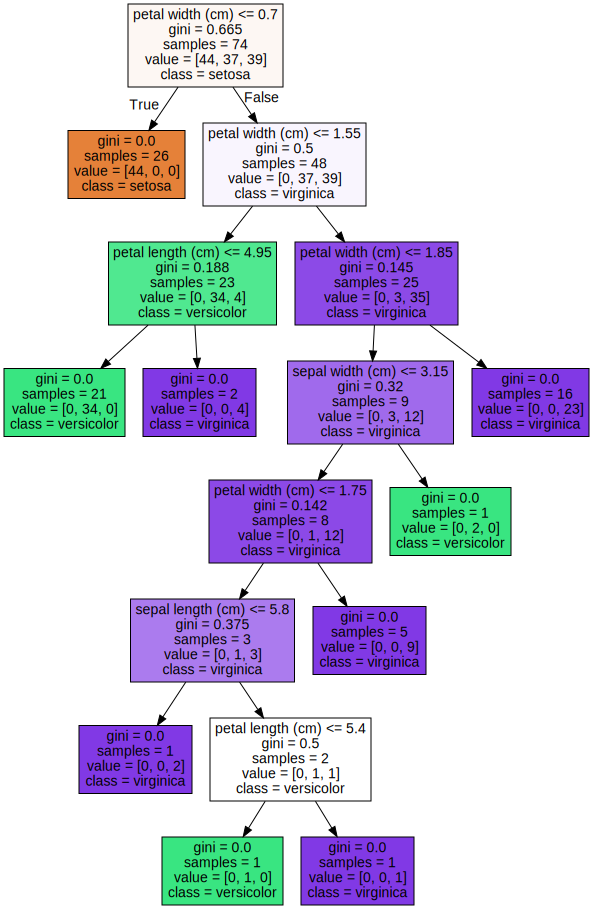

In [66]:
dot_data = Source(tree.export_graphviz(random_forest.estimators_[0], out_file=None,
                                        feature_names=iris.feature_names, class_names=iris.target_names,
                                        filled=True))
SVG(dot_data.pipe(format='svg'))

Given the following data, which specify classifications for nine combinations of VAR1 and VAR2 predict a classification for a case where VAR1=0.906 and VAR2=0.606, using the result of kmeans clustering with 3 means (i.e., 3 centroids)
VAR1        VAR2        CLASS
1.713        1.586         0
0.180        1.786         1
0.353        1.240         1
0.940        1.566         0
1.486        0.759         1
1.266        1.106         0
1.540        0.419         1
0.459        1.799         1
0.773        0.186         1

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [68]:
data = {
    'VAR1': [1.713, 0.180, 0.353, 0.940, 1.486, 1.266, 1.540, 0.459, 0.773],
    'VAR2': [1.586, 1.786, 1.240, 1.566, 0.759, 1.106, 0.419, 1.799, 0.186],
    'CLASS': [0, 1, 1, 0, 1, 0, 1, 1, 1]
}

In [69]:
df = pd.DataFrame(data)

In [70]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['VAR1', 'VAR2']])

In [71]:
wcss = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

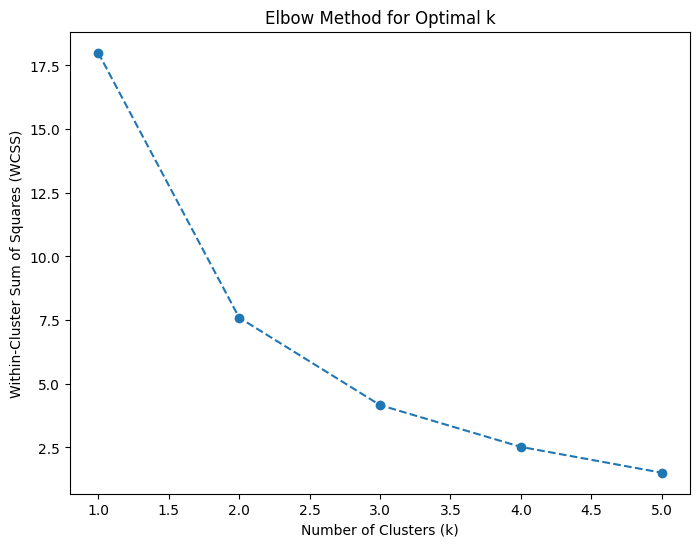

In [73]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [74]:
optimal_k = 2

In [75]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


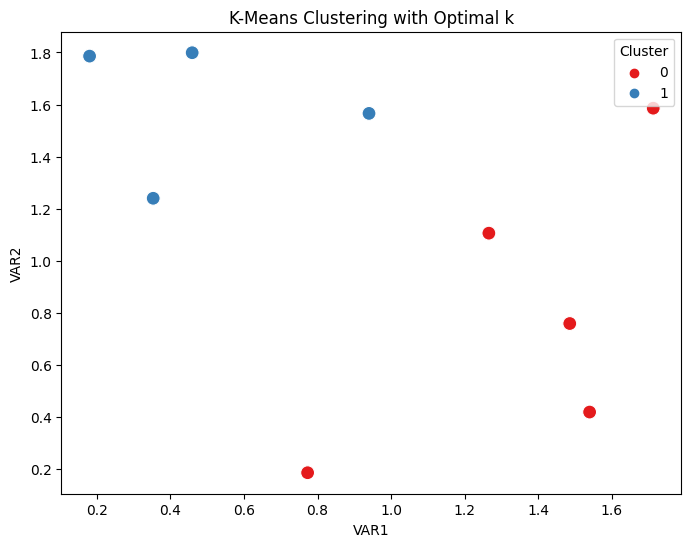

In [76]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='VAR1', y='VAR2', hue='Cluster', palette='Set1', s=100)
plt.xlabel('VAR1')
plt.ylabel('VAR2')
plt.title('K-Means Clustering with Optimal k')
plt.legend(title='Cluster')
plt.show()

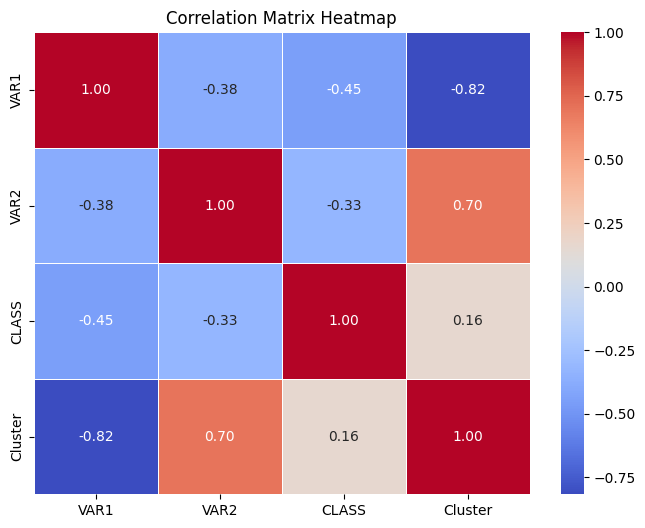

In [77]:
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()